In [8]:
# Import libraries
import pandas as pd
import numpy as np
from collections import Counter
import warnings
import re
warnings.filterwarnings('ignore')

# NLP and Text Processing
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

# Data Visualization
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you've downloaded the stopwords dataset from NLTK
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

# Data Loading

In [9]:
# Import dataset
df = pd.read_csv('/kaggle/input/restaurant-reviews/Restaurant reviews.csv')

# Display shape and columns
print("Shape of DataFrame:", df.shape)
print("Columns in DataFrame:", df.columns)

# Display first 20 rows
print(df.head())


Shape of DataFrame: (10000, 8)
Columns in DataFrame: Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', '7514'],
      dtype='object')
        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures    7514  
0   1 Review , 2 Followers  5/25/2019 15:54         0  2447.0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         

# Data Cleaning

In [10]:
# Drop unnecessary columns
df.drop(['Restaurant', 'Reviewer', 'Metadata', 'Time', 'Pictures', '7514'], axis='columns', inplace=True)

# Convert column names to lowercase
df.columns = map(str.lower, df.columns)


# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()


review    45
rating    38
dtype: int64


In [11]:
# Check unique ratings
print(np.unique(df['rating']))


['1' '1.5' '2' '2.5' '3' '3.5' '4' '4.5' '5' 'Like']


In [12]:
# Replace 'Like' with '5' and convert ratings to float
df['rating'] = df['rating'].replace(['Like'], '5')
df['rating'] = df['rating'].astype(float)


In [13]:
# Normalize ratings
df['rating'] = df['rating'].replace({
    4.5: 4.0,
    3.5: 3.0,
    2.5: 2.0,
    1.5: 1.0
})


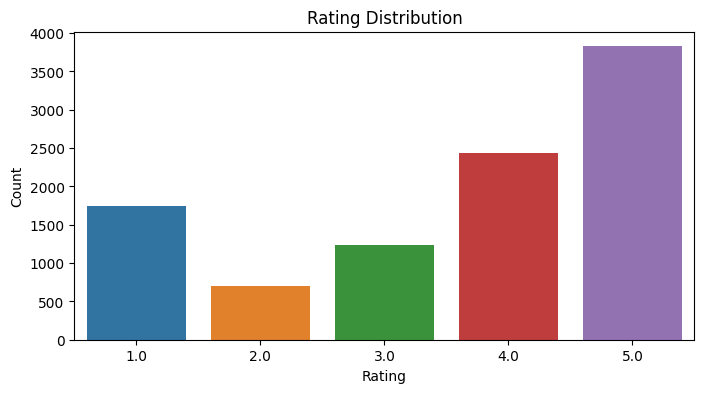

In [14]:
# Review Distribution
rating_counts = df['rating'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

# Preprocess text

In [15]:
#DATA PREPROCESSING
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # lowercase
    text = re.sub("\[.*?\]", " ", text)
    # text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub("[^a-zA-Z\s]+", " ", text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.strip()  # remove leading/trailing whitespace
    return text


df['review_a'] = df['review'].apply(preprocess_text)

df.head(40)

,review,rating,review_a
0,"The ambience was good, food was quite good . h...",5.0,the ambience was good food was quite good h...
1,Ambience is too good for a pleasant evening. S...,5.0,ambience is too good for a pleasant evening s...
2,A must try.. great food great ambience. Thnx f...,5.0,a must try great food great ambience thnx fo...
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen das and arun was a great guy only beca...
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food is good we ordered kodi drumsticks and ba...
5,"Ambiance is good, service is good, food is aPr...",5.0,ambiance is good service is good food is apr...
6,"Its a very nice place, ambience is different, ...",5.0,its a very nice place ambience is different ...
7,Well after reading so many reviews finally vis...,4.0,well after reading so many reviews finally vis...
8,"Excellent food , specially if you like spicy f...",5.0,excellent food specially if you like spicy f...
9,Came for the birthday treat of a close friend....,5.0,came for the birthday treat of a close friend ...


In [16]:
# Average word length
def avg_word(sentence):
    words = sentence.split()
    return sum(len(word) for word in words) / len(words)

In [17]:
df

,review,rating,review_a
0,"The ambience was good, food was quite good . h...",5.0,the ambience was good food was quite good h...
1,Ambience is too good for a pleasant evening. S...,5.0,ambience is too good for a pleasant evening s...
2,A must try.. great food great ambience. Thnx f...,5.0,a must try great food great ambience thnx fo...
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen das and arun was a great guy only beca...
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food is good we ordered kodi drumsticks and ba...
...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0,madhumathi mahajan well to start with nice cou...
9996,This place has never disappointed us.. The foo...,4.0,this place has never disappointed us the food...
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.0,bad rating is mainly because of chicken bone ...
9998,I personally love and prefer Chinese Food. Had...,4.0,i personally love and prefer chinese food had...


In [18]:
# Stopwords count
stop = stopwords.words('english')
df['stopwords'] = df['review_a'].apply(lambda x: len([x for x in x.split() if x in stop]))
print(df[['review_a', 'stopwords']].head())
print(f'Mean stopwords count: {df.stopwords.mean()}')


                                            review_a  stopwords
0  the ambience was good  food was quite good   h...         14
1  ambience is too good for a pleasant evening  s...         12
2  a must try  great food great ambience  thnx fo...         11
3  soumen das and arun was a great guy  only beca...         14
4  food is good we ordered kodi drumsticks and ba...         11
Mean stopwords count: 22.65906579608237


In [19]:
df

,review,rating,review_a,stopwords
0,"The ambience was good, food was quite good . h...",5.0,the ambience was good food was quite good h...,14
1,Ambience is too good for a pleasant evening. S...,5.0,ambience is too good for a pleasant evening s...,12
2,A must try.. great food great ambience. Thnx f...,5.0,a must try great food great ambience thnx fo...,11
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen das and arun was a great guy only beca...,14
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food is good we ordered kodi drumsticks and ba...,11
...,...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0,madhumathi mahajan well to start with nice cou...,75
9996,This place has never disappointed us.. The foo...,4.0,this place has never disappointed us the food...,20
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.0,bad rating is mainly because of chicken bone ...,125
9998,I personally love and prefer Chinese Food. Had...,4.0,i personally love and prefer chinese food had...,52


In [20]:
# Most frequent words
freq = pd.Series(' '.join(df['review_a']).split()).value_counts()[:10]
print(freq)

the     23291
and     17637
was     10320
to       9906
a        9758
is       9251
i        8036
of       7460
good     7230
it       7008
Name: count, dtype: int64


In [21]:


print(f'There are around {int(df["review_a"].duplicated().sum())} duplicated reviews, we will remove them.')



There are around 695 duplicated reviews, we will remove them.


In [22]:
df.drop_duplicates("review_a", inplace=True)

# Stemming and Lemmatization

In [23]:
print(df.head())

                                              review  rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                                            review_a  stopwords  
0  the ambience was good  food was quite good   h...         14  
1  ambience is too good for a pleasant evening  s...         12  
2  a must try  great food great ambience  thnx fo...         11  
3  soumen das and arun was a great guy  only beca...         14  
4  food is good we ordered kodi drumsticks and ba...         11  


In [24]:
# Stopwords count
stop = stopwords.words('english')
df['stopwords'] = df['review_a'].apply(lambda x: len([x for x in x.split() if x in stop]))
print(df[['review_a', 'stopwords']].head())
print(f'Mean stopwords count: {df.stopwords.mean()}')

                                            review_a  stopwords
0  the ambience was good  food was quite good   h...         14
1  ambience is too good for a pleasant evening  s...         12
2  a must try  great food great ambience  thnx fo...         11
3  soumen das and arun was a great guy  only beca...         14
4  food is good we ordered kodi drumsticks and ba...         11
Mean stopwords count: 24.34330453563715


In [25]:
# Most frequent words
freq = pd.Series(' '.join(df['review_a']).split()).value_counts()[:10]
print(freq)

the     23287
and     17637
was     10310
to       9906
a        9758
is       9242
i        8036
of       7460
it       7004
good     6822
Name: count, dtype: int64


In [26]:
# Remove stopwords
df['review_a'] = df['review_a'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(df['review_a'].head())

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food good ordered kodi drumsticks basket mutto...
Name: review_a, dtype: object


In [27]:
stopwords = set(STOPWORDS)
stopwords.update(['chicken']) # creating a custom list based on domain knowledge

In [28]:
# Most frequent words after stopwords removal
freq = pd.Series(' '.join(df['review_a']).split()).value_counts()
freq = freq[freq > 500]
print(freq[:10])

good        6822
food        6613
place       5734
service     3219
chicken     3105
taste       2273
ordered     2178
ambience    2126
great       1974
one         1943
Name: count, dtype: int64


In [29]:
# Remove most frequent words
# freq = list(freq.index)
# df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
# print(df['review'].head())


In [30]:
# Least frequent words
freq = pd.Series(' '.join(df['review_a']).split()).value_counts()
freq = freq[freq < 5]
print(freq[:10])

favs         4
plated       4
teppan       4
arguments    4
grains       4
lag          4
neel         4
relation     4
holds        4
sold         4
Name: count, dtype: int64


# Sentiment Analysis

In [31]:
# Sentiment analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['review_a'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
print(df[['review_a', 'rating', 'sentiment', 'sentiment_label']].head())


                                            review_a  rating  sentiment  \
0  ambience good food quite good saturday lunch c...     5.0   0.660000   
1  ambience good pleasant evening service prompt ...     5.0   0.708333   
2  must try great food great ambience thnx servic...     5.0   0.550000   
3  soumen das arun great guy behavior sincerety g...     5.0   0.750000   
4  food good ordered kodi drumsticks basket mutto...     5.0   0.560000   

  sentiment_label  
0        positive  
1        positive  
2        positive  
3        positive  
4        positive  


# Visualisationn

In [32]:
negative_reviews = ' '.join(df[df['sentiment_label'] == 'negative']['review_a'])

In [33]:
df.head()

,review,rating,review_a,stopwords,sentiment,sentiment_label
0,"The ambience was good, food was quite good . h...",5.0,ambience good food quite good saturday lunch c...,14,0.660000,positive
1,Ambience is too good for a pleasant evening. S...,5.0,ambience good pleasant evening service prompt ...,12,0.708333,positive
2,A must try.. great food great ambience. Thnx f...,5.0,must try great food great ambience thnx servic...,11,0.550000,positive
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen das arun great guy behavior sincerety g...,14,0.750000,positive
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food good ordered kodi drumsticks basket mutto...,11,0.560000,positive


In [34]:
negative_reviews

'ordered corn cheese balls manchow soup paneer shashlik sizzler sizzler stale paneer smelling waiter impolite even accept mistake never going went team lunch worst restaurant food tasteless service slow ac working requested multiple times use please waste money strictly recommend prefer beyond flavours worst experience restaurant ever first starters served half hour ordering chicken popcorn hair strand yuck guy took main course order forgot completely order waiting almost hour wait another half hour get food worst got us chicken lasagna instead veg lasagna figured chicken right one staunch vegetarian friend almost ate recommend place many better places gachibowli could save time provide better service worst service experience food ok took mins get veg pulav never seen restaurant take time visit office lunch outing rating would mixed food fine service bad booked table day still wait mins get one manager polite gave rubbish reasons bad service ambiance fine pathetic horrible experience a

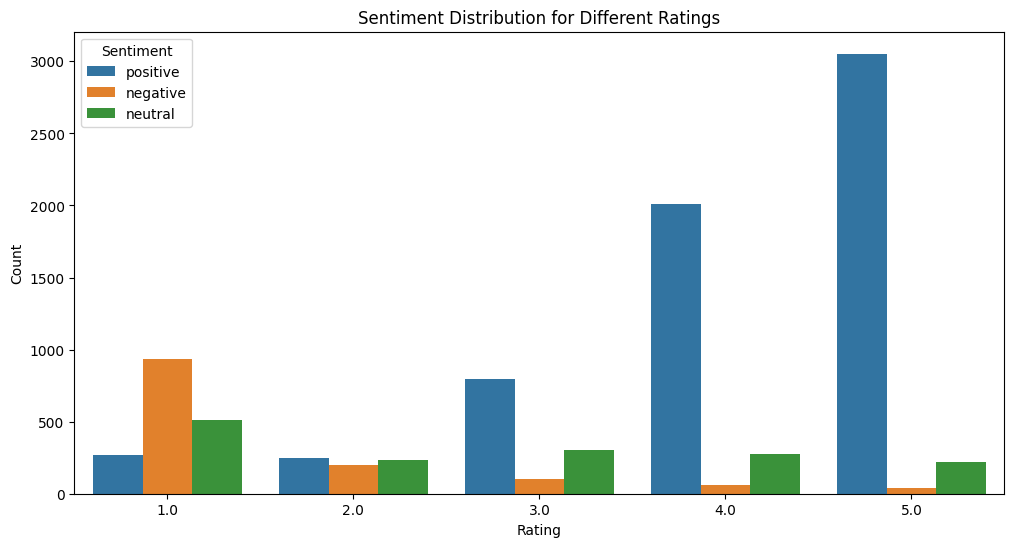

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='sentiment_label')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Different Ratings')
plt.legend(title='Sentiment')
plt.show()

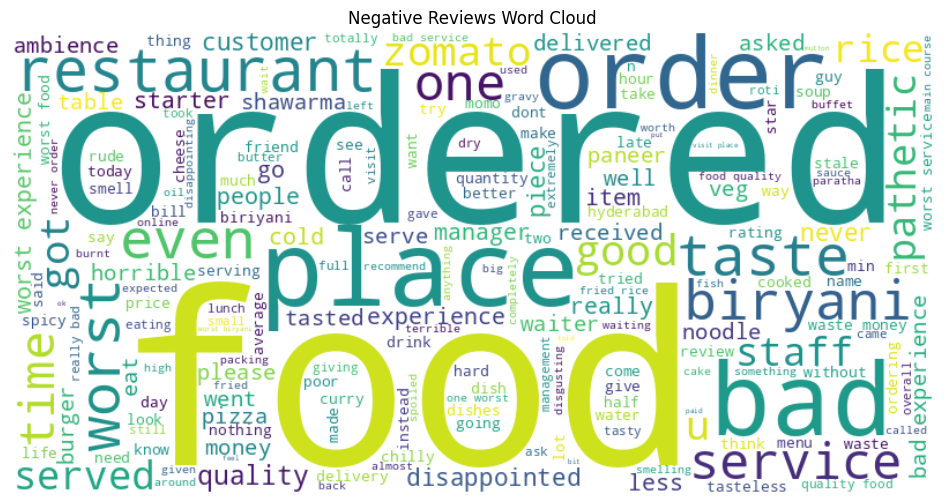

In [36]:
negative_reviews = ' '.join(df[df['sentiment_label'] == 'negative']['review_a'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

In [ ]:
# def preprocess_text_data(text):
#     tokens = [token for token in text.lower().split() if token.isalnum()] # tokenize text and remove stopwords
#     return tokens

# texts = [preprocess_text(text) for text in df[df['sentiment_label']=='negative']['review_a']]

# texts[:5]